# Goal

In this notebook we load in the ice-sheet model ensemble data and visualize its properties. We have the following ensembles:

    1. Last-Interglacial (LIG)
    2. Representive Concentration Pathway 8.5 (RCP8.5)
    
each with 196 members from a 14x14 factorial sampling of ice-sheet model parameters CREVLIQ and CLIFVMAX. We will load in and plot.

Ice-sheet model simulations are archived as pickle files using Pandas, and are freely available to download from https://doi.org/10.5281/zenodo.3478486.

# Setup

In [1]:
# import the relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
# set the default colormap
plt.set_cmap('viridis')
# define 14 different colors for the timeseries plots
from lig_utilities import call_scm_cmap, uniform_cmap_slices
cmap=call_scm_cmap('roma')
cols=uniform_cmap_slices(cmap,14,col_range=[0,1.0])[::-1]
# import the rectangle feature
import matplotlib.patches as patches
# define the save path for our plots
save_path='./figures/'
# set the default grid and plotting styles
plt.rcParams['grid.color'] = 'k'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams["legend.framealpha"]

0.8

<Figure size 432x288 with 0 Axes>

## Load Data

In [3]:
# define the data locations
lig_path='./data/lig_data_dec18.pk1'
rcp85_path='./data/rcp85_data_sept18.pk1'

In [4]:
# load dictionaries containing the data
lig_data=pickle.load( open( lig_path, "rb" ) )
rcp85_data=pickle.load( open( rcp85_path, "rb" ) )

The pickles each contain a dictionary which has pandas dataframes with the data from the total Antarctic Ice-sheet (tais), Western Antarctic Ice-Sheet (wais) and Eastern Antarctic Ice-Sheet (eais). Also included in the dictionaries are arrays defining the two parameters that the ensembles are varied over: CREVLIQ (the model's sensitivity to hydrofracturing from meltwater) and CLIFVMAX (the model's maximum rate of cliff retreat after a cliff becomes mechanically unstable).

Let's look at the specific objects the dictionaries hold:

In [5]:
lig_data.keys()

dict_keys(['tais', 'clifvmax', 'crevliq', 'wais', 'eais'])

### Get Parameter Value Grids

Isolate the parameter values, which are identical in each dictionary:

In [6]:
crevliq=lig_data['crevliq']
clifvmax=lig_data['clifvmax']

### Assign LIG index

The LIG index in its original format may be updated, knowing that the run is meant to represent 130-125ka before present (where present is defined at 1950 by convention).

In [7]:
# create the new time index, with the same length as current index
ntime_lig=len(lig_data['tais'])
# time goes from 130ka to 125ka, we will use fractional years for plotting
lig_time=np.linspace(130,125,ntime_lig)
# assign the index in each dataframe
lig_data['tais'].index=lig_time
lig_data['wais'].index=lig_time
lig_data['eais'].index=lig_time

Note that because the index runs from higher values to lower values, a typical timeseries plot will need to have it's x-axis reversed.

# Visualize the Data

## LIG Timeseries, Color-code by CLIFVMAX

<Figure size 432x288 with 0 Axes>

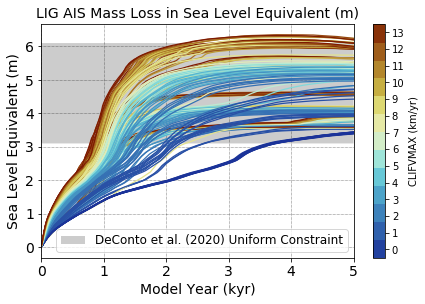

In [8]:
# Using contourf to provide my colorbar info, then clearing the figure
Z = [[0,0],[0,0]]
levels = range(0,len(cols),1)
CS3 = plt.contourf(Z, levels, cmap=cmap.reversed())
plt.clf()

# get the handles
lig_ts_fig=plt.figure(figsize=(7,4.3))
ax = plt.gca()
# plot the data with color color coding by crevliq
kind_crevliq=0
kind_clifvmax=0
for k in range(196):
    kind_clifvmax=np.mod(k,14)
    if kind_clifvmax==13 and kind_crevliq!=13:
        kind_crevliq=kind_crevliq+1
    plt.plot(np.arange(5001)[::-1],np.asarray(lig_data['tais'])[:,k],c=cols[kind_clifvmax], lw=1.25)
# plot the proxy range:

ax.fill_between(np.arange(5001)[::-1], 
                    y1=3.1,
                    y2=6.1,
                    alpha=0.20, facecolor='k', label='DeConto et al. (2020) Uniform Constraint')
# flip x-axis
plt.xlim([0,5000])
plt.yticks(fontsize=14)
plt.xticks(np.linspace(0,5000,6),labels=(np.linspace(5,0,6,dtype='int64')),fontsize=14)
ax.invert_xaxis()
# add grid, title, etc.
plt.grid()
plt.title('LIG AIS Mass Loss in Sea Level Equivalent (m)',fontsize=14)
plt.xlabel('Model Year (kyr)',fontsize=14)
plt.ylabel('Sea Level Equivalent (m)',fontsize=14)
plt.legend(loc='best',fontsize=12)

cbar=plt.colorbar(CS3)
tick_locs = (np.arange(len(cols)) + 0.5)*(len(cols)-1)/len(cols)
cbar.set_ticks(tick_locs)
cbar.ax.set_yticklabels(clifvmax)
cbar.set_label('CLIFVMAX (km/yr)')

plt.show()

In [9]:
# save the plot out
savename='Fig1a.pdf'
lig_ts_fig.savefig(save_path+savename)

## Now Color-code by CREVLIQ

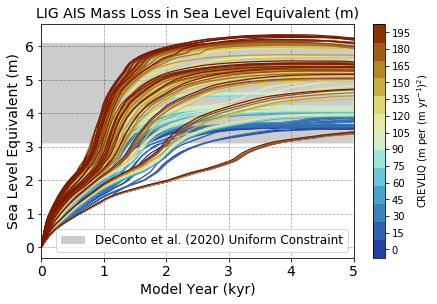

In [10]:
# get the handles
lig_ts_fig_crev=plt.figure(figsize=(7,4.3))
ax = plt.gca()
# plot the data with color color coding by crevliq
kind_crevliq=0
kind_clifvmax=0
for k in range(196):
    kind_clifvmax=np.mod(k,14)
    if kind_clifvmax==13 and kind_crevliq!=13:
        kind_crevliq=kind_crevliq+1
    plt.plot(np.arange(5001)[::-1],np.asarray(lig_data['tais'])[:,k],c=cols[kind_crevliq], lw=1.25)
# plot the proxy range:

ax.fill_between(np.arange(5001)[::-1], 
                    y1=3.1,
                    y2=6.1,
                    alpha=0.20, facecolor='k', label='DeConto et al. (2020) Uniform Constraint')
# flip x-axis
plt.xlim([0,5000])
plt.yticks(fontsize=14)
plt.xticks(np.linspace(0,5000,6),labels=(np.linspace(5,0,6,dtype='int64')),fontsize=14)
ax.invert_xaxis()
# add grid, title, etc.
plt.grid()
plt.title('LIG AIS Mass Loss in Sea Level Equivalent (m)',fontsize=14)
plt.xlabel('Model Year (kyr)',fontsize=14)
plt.ylabel('Sea Level Equivalent (m)',fontsize=14)
plt.legend(loc='best',fontsize=12)

cbar=plt.colorbar(CS3)
tick_locs = (np.arange(len(cols)) + 0.5)*(len(cols)-1)/len(cols)
cbar.set_ticks(tick_locs)
cbar.ax.set_yticklabels(crevliq)
cbar.set_label('CREVLIQ (m per (m yr$^{−1}$)$^{2}$)')

plt.show()

In [11]:
# save the plot out
savename='FigS1a.pdf'
lig_ts_fig_crev.savefig(save_path+savename)

## LIG Parameter Space

Let's look at a timeslice of the data at 125ka, to see how the sea level contributions from the total Antarctic Ice-Sheet vary as a function of our two parameters CREVLIQ and CLIFVMAX:

In [12]:
# define the number of different values of our two parameters (both should be 14), print to double-check
n_param_vals=len(crevliq)
print(n_param_vals)
# check this one too
print(len(clifvmax))

14
14


In [13]:
# get the index for 125ka, and then get the data there
ind125=(lig_data['tais'].index==125)
lig125_ravel=np.asarray(lig_data['tais'][ind125],dtype='float64')

# create a meshgrid of the defined parameters, and then reshape
xv, yv= np.meshgrid(clifvmax, crevliq, indexing='ij')
X=np.transpose([yv,xv]).reshape(n_param_vals*n_param_vals,2)

In [14]:
# define a range for the contour plot
print(np.min(lig125_ravel))
print(np.max(lig125_ravel))
c_range=[3.5,6.5]
# build the colorbar
clevels=np.linspace(c_range[0],c_range[1],11)
lig_levels=np.linspace(c_range[0],c_range[1],11)

3.38520002365
6.24410009384


/opt/sw/packages/gcc-4.8/python/3.5.2/lib/python3.5/site-packages/numpy-1.11.3-py3.5-linux-x86_64.egg/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


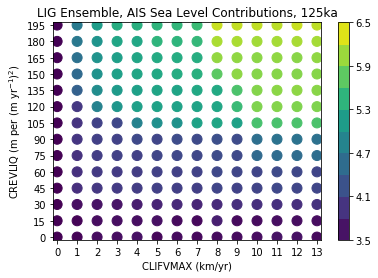

In [15]:
# plot the simulations at 125ka
lig125_param_fig=plt.figure()
# build a plain background to fix our colorbar
miss=np.empty((14,14),dtype='float64')
miss[:]=np.nan
c1=plt.contourf(clifvmax,crevliq,miss,clevels)
c2=plt.scatter(X[:,1],X[:,0],c=np.squeeze(lig125_ravel),s=100,norm=c1.norm)
plt.title('LIG Ensemble, AIS Sea Level Contributions, 125ka')
plt.xlabel('CLIFVMAX (km/yr)')
plt.ylabel('CREVLIQ (m per (m yr$^{−1}$)$^{2}$)')
plt.ylim([-2.5,197.5])
plt.xlim([-0.2,13.2])
plt.xticks(clifvmax)
plt.yticks(crevliq)
plt.colorbar(c1)
plt.show()

## RCP8.5 Timeseries

Now let's look at the projections in sea level rise from Antarctic contributions starting in (and relative to) 1950 and running through the end of 2150. We are most interested in the immediate changes (e.g., through the end of the century), but we also want to look through 2150.

In [16]:
# get the time index which is shared by all modern scenarios
modern_time=rcp85_data['tais'].index

### Zero out in 2000

Set all changes in the training data (and thus the emulator) relative to the year 2000.

In [17]:
# zero out every rcp run at 2000
rcp2000_i=np.where(modern_time==2000)
rcp85_data['tais']=rcp85_data['tais']-rcp85_data['tais'].iloc[int(np.squeeze(rcp2000_i))]

### Through 2150

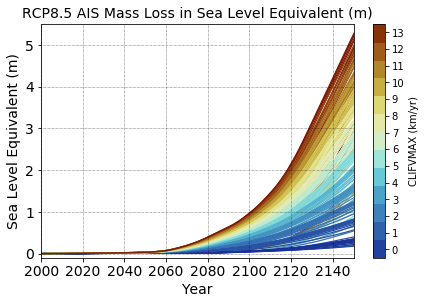

In [18]:
# get the handles
rcp85_2150ts_fig=plt.figure(figsize=(7,4.3))
ax = rcp85_2150ts_fig.add_subplot(111, aspect='equal')
# plot the data with color color coding by crevliq
kind_crevliq=0
kind_clifvmax=0
for k in range(196):
    kind_clifvmax=np.mod(k,14)
    if kind_clifvmax==13 and kind_crevliq!=13:
        kind_crevliq=kind_crevliq+1
    c3=plt.plot(modern_time,np.asarray(rcp85_data['tais'])[:,k],c=cols[kind_clifvmax],zorder=1, lw=1.25)
# add a box around 2100
#rectangle=patches.Rectangle(xy=(2000,-0.2),width=100,height=1.3,linewidth=1.5, \
#                            linestyle='-',edgecolor='k',alpha=0.8,facecolor='none',zorder=10)
#ax.add_patch(rectangle)
# add grid, title, etc.
plt.axis('tight')
plt.grid()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('RCP8.5 AIS Mass Loss in Sea Level Equivalent (m)',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Sea Level Equivalent (m)',fontsize=14)
plt.xlim([2000,2150])
plt.ylim([-0.1,5.5])

cbar=plt.colorbar(CS3)
tick_locs = (np.arange(len(cols)) + 0.5)*(len(cols)-1)/len(cols)
cbar.set_ticks(tick_locs)
cbar.ax.set_yticklabels(clifvmax)
cbar.set_label('CLIFVMAX (km/yr)')

plt.show()

In [19]:
# save the plot out
savename='Fig1b.pdf'
rcp85_2150ts_fig.savefig(save_path+savename)

From here we can see how the runs evolve over time, and the spread among invidual ensemble members. We can also clearly see some gaps between runs that our emulator will be designed to fill.

### Color-code by CREVLIQ throgh 2150

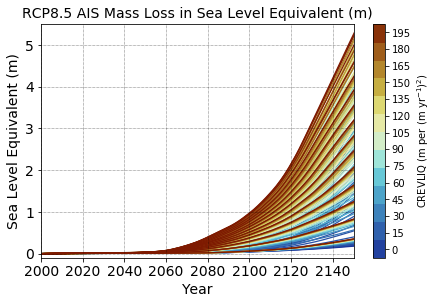

In [20]:
# get the handles
rcp85_2150ts_fig=plt.figure(figsize=(7,4.3))
ax = rcp85_2150ts_fig.add_subplot(111, aspect='equal')
# plot the data with color color coding by crevliq
kind_crevliq=0
kind_clifvmax=0
for k in range(196):
    kind_clifvmax=np.mod(k,14)
    if kind_clifvmax==13 and kind_crevliq!=13:
        kind_crevliq=kind_crevliq+1
    c3=plt.plot(modern_time,np.asarray(rcp85_data['tais'])[:,k],c=cols[kind_crevliq],zorder=1, lw=1.25)
# add a box around 2100
#rectangle=patches.Rectangle(xy=(2000,-0.2),width=100,height=1.3,linewidth=1.5, \
#                            linestyle='-',edgecolor='k',alpha=0.8,facecolor='none',zorder=10)
#ax.add_patch(rectangle)
# add grid, title, etc.
plt.axis('tight')
plt.grid()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('RCP8.5 AIS Mass Loss in Sea Level Equivalent (m)',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Sea Level Equivalent (m)',fontsize=14)
plt.xlim([2000,2150])
plt.ylim([-0.1,5.5])

cbar=plt.colorbar(CS3)
tick_locs = (np.arange(len(cols)) + 0.5)*(len(cols)-1)/len(cols)
cbar.set_ticks(tick_locs)
cbar.ax.set_yticklabels(crevliq)
cbar.set_label('CREVLIQ (m per (m yr$^{−1}$)$^{2}$)')

plt.show()

In [21]:
# save the plot out
savename='FigS1b.pdf'
rcp85_2150ts_fig.savefig(save_path+savename)

## RCP8.5 Parameter Space (in 2100)

Let's look at the parameter space for RCP8.5 in 2100:

In [22]:
# get the index for 2100
ind_2100=(rcp85_data['tais'].index==2100)
ind_2150=(rcp85_data['tais'].index==2150)
# get the data at 2100:
rcp85_2100_ravel=np.asarray(rcp85_data['tais'][ind_2100])
rcp85_2150_ravel=np.asarray(rcp85_data['tais'][ind_2150])

In [23]:
print(np.mean(rcp85_2100_ravel))
print(np.mean(rcp85_2150_ravel))

0.419493
2.32896


In [24]:
# define a range for the contour plot
print(np.min(rcp85_2100_ravel))
print(np.max(rcp85_2100_ravel))
c_range=[0,1.0]
clevels=np.linspace(c_range[0],c_range[1],11)
rcp_levels=np.linspace(c_range[0],c_range[1],11)

0.0401
0.9724


/opt/sw/packages/gcc-4.8/python/3.5.2/lib/python3.5/site-packages/numpy-1.11.3-py3.5-linux-x86_64.egg/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


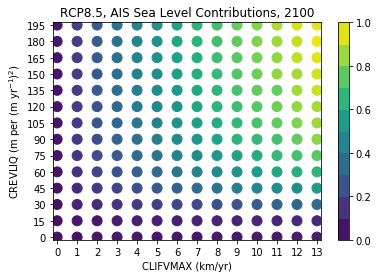

In [25]:
# plot the simulations at 125ka
rcp85_param_fig=plt.figure()
c1=plt.contourf(clifvmax,crevliq,miss,clevels)
c2=plt.scatter(X[:,1],X[:,0],c=np.squeeze(rcp85_2100_ravel),s=100,norm=c1.norm)
plt.title('RCP8.5, AIS Sea Level Contributions, 2100')
plt.xlabel('CLIFVMAX (km/yr)')
plt.ylabel('CREVLIQ (m per (m yr$^{−1}$)$^{2}$)')
plt.ylim([-2.5,197.5])
plt.xlim([-0.2,13.2])
plt.xticks(clifvmax)
plt.yticks(crevliq)
plt.colorbar(c1)
plt.show()

## RCP8.5 vs. LIG in Parameter Space

Plot the overlap between LIG and RCP8.5 (in 2100) AIS contributions to SLR in parameter space.

In [26]:
# build the grids and contour levels
rcp_levels=np.arange(-0.1,1.0,0.1)
lig_levels=np.arange(2.5,7.5,0.5)

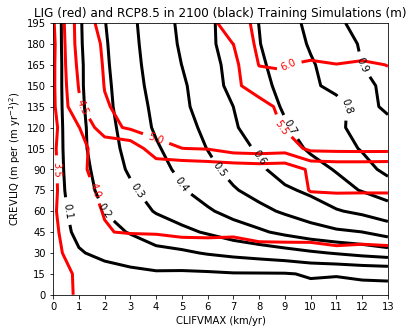

In [27]:
lig_vs_rcp_param_fig, ax = plt.subplots(figsize=(6,5))
c1=ax.contour(xv.T,yv.T,rcp85_2100_ravel.reshape(14,14),linewidths=3,levels=rcp_levels,colors='k')
c1.clabel(rcp_levels,fmt='%2.1f')
c2=ax.contour(xv.T,yv.T,lig125_ravel.reshape(14,14),linewidths=3,levels=lig_levels,colors='r')
c2.clabel(lig_levels,fmt='%2.1f')
plt.yticks(crevliq)
plt.xticks(clifvmax)
plt.ylabel('CREVLIQ (m per (m yr$^{−1}$)$^{2}$)')
plt.xlabel('CLIFVMAX (km/yr)')
plt.title('LIG (red) and RCP8.5 in 2100 (black) Training Simulations (m)')
plt.axis('tight')
plt.show()

In [28]:
# save the plot out
savename='FigS2.pdf'
lig_vs_rcp_param_fig.savefig(save_path+savename)

## Compare with IMBIE2 trends

Here we briefly compare the trends between the RCP8.5 ice-sheet model runs and the trends from IMBIE2.

In [29]:
# isolate the years
imbie_time_i=np.where(np.logical_and(modern_time>=1991,modern_time<=2018))
tais_imbie=np.squeeze(np.asarray(rcp85_data['tais'])[imbie_time_i,:])
# calculate the trends
tais_dt=np.gradient(tais_imbie,axis=0)

In [30]:
# now calculate the trend over the period, 1992-2017
tais_trend=(tais_imbie[-2,:]-tais_imbie[1,:])*1000/(modern_time[imbie_time_i][-2]-modern_time[imbie_time_i][1])
rcp_in_bounds=np.logical_and(tais_trend<=0.46,tais_trend>=0.15)
fail_rcp=np.squeeze(np.where(rcp_in_bounds==False))
count=np.sum(np.logical_and(tais_trend<=0.46,tais_trend>=0.15))
count/196

0.80612244897959184

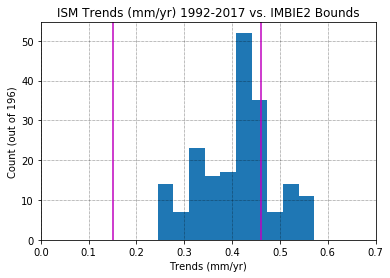

In [31]:
# plot the histogram of trends
plt.hist(tais_trend)
plt.axvline(x=0.15,c='m')
plt.axvline(x=0.46,c='m')
plt.xlim([0,0.7])
plt.title('ISM Trends (mm/yr) 1992-2017 vs. IMBIE2 Bounds')
plt.xlabel('Trends (mm/yr)')
plt.ylabel('Count (out of 196)')
plt.grid()
plt.show()

## Ice-Loss Acceleration

We plot the derivative of ice-sheet loss.

In [32]:
# calculate the derivative, which is annual, and convert to mm/yr
dt=modern_time[1]-modern_time[0]
rcp85_annual_dt=np.gradient(rcp85_data['tais'],dt,axis=0)*1000

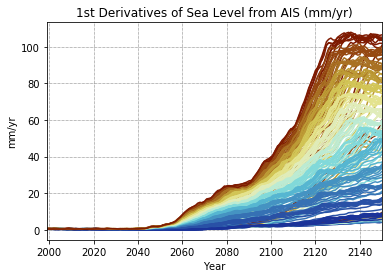

In [33]:
slrdt=plt.figure()
kind_crevliq=0
for k in range(196):
    kind_clifvmax=np.mod(k,14)
    if kind_clifvmax==13 and kind_crevliq!=13:
        kind_crevliq=kind_crevliq+1
    plt.plot(modern_time,rcp85_annual_dt[:,k],c=cols[kind_clifvmax])

plt.title('1st Derivatives of Sea Level from AIS (mm/yr)')
plt.ylabel('mm/yr')
plt.xlabel('Year')
plt.xlim([1999,2150])
plt.grid()
plt.show()

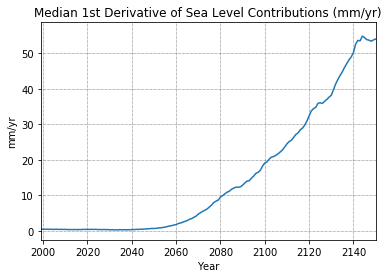

55.95
2153.0


In [34]:
# find the median over time
plt.plot(modern_time,np.median(rcp85_annual_dt,axis=1))
plt.title('Median 1st Derivative of Sea Level Contributions (mm/yr)')
plt.ylabel('mm/yr')
plt.xlabel('Year')
plt.xlim([1999,2150])
plt.grid()
plt.show()
# find the maximum value
print(np.max(np.median(rcp85_annual_dt,axis=1)))
# and year
print(modern_time[np.median(rcp85_annual_dt,axis=1).argmax()])